# Predictive Modeling of Real Estate Trends

## Introduction

### The real estate market is a dynamic and complex environment influenced by numerous factors including economic conditions, demographics, and regional trends. In this project, we aim to leverage data-driven insights to predict price cuts in the real estate market based on historical home values. By employing various machine learning algorithms, including Linear Regression, Random Forest, Support Vector Regression (SVR), and Gradient Boosting Regressor, we seek to identify the most effective model for forecasting price adjustments in different regions across the United States.3

## Objective

### The primary objective of this project is to develop robust predictive models that can accurately anticipate price cuts in real estate listings. Specifically, we will:



#### -Explore and preprocess a comprehensive dataset encompassing historical home values and associated metrics.




#### -Perform exploratory data analysis (EDA) to uncover patterns and trends in home values over time and across different regions.

#### -Train multiple machine learning models to predict price cuts based on features derived from home value trends, temporal data, and other relevant factors.

#### -Evaluate and compare the performance of each model using metrics such as Mean Squared Error (MSE), ensuring robustness and accuracy in predictions.

#### -Provide actionable insights and recommendations for stakeholders in the real estate industry based on our findings.

## Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np


In [2]:


df = pd.read_csv(r'D:\USRealEstateTrends.csv')


In [3]:
df.head()

,RegionID,SizeRank,RegionName,StateName,2000-02-HomeValue,2000-03-HomeValue,2000-04-HomeValue,2000-05-HomeValue,2000-06-HomeValue,2000-07-HomeValue,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,123048.375901,123316.373392,123891.175404,124552.703606,125261.950998,126013.182906,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,217413.348751,218341.844065,220223.334853,222171.683720,224331.715643,226691.604401,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,230191.681333,231328.440994,233590.210855,236063.878014,238520.221749,241038.221287,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,154332.573521,154604.414602,155280.687654,156094.162793,157007.101990,157978.803091,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,128259.611168,128325.255585,128495.727241,128720.489451,128947.995217,129186.531899,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [4]:
#check for missing value

missing_values=df.isnull().sum()


In [5]:
missing_values

RegionID                 0
SizeRank                 0
RegionName               0
StateName                1
2000-02-HomeValue      463
                      ... 
2024-04-DaysPending    177
2024-04-CutRaw         234
2024-05-HomeValue        0
2024-05-DaysPending    158
2024-05-CutRaw         174
Length: 450, dtype: int64

In [6]:
df.dtypes

RegionID                 int64
SizeRank                 int64
RegionName              object
StateName               object
2000-02-HomeValue      float64
                        ...   
2024-04-DaysPending    float64
2024-04-CutRaw         float64
2024-05-HomeValue      float64
2024-05-DaysPending    float64
2024-05-CutRaw         float64
Length: 450, dtype: object

In [7]:
#handling numerical missing data 
numeric_columns=df.select_dtypes(include=['int64','float64']).columns
df[numeric_columns]=df[numeric_columns].apply(lambda x: x.fillna(x.median()))
#handling catagorical missing value 
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [8]:

df.head()

,RegionID,SizeRank,RegionName,StateName,2000-02-HomeValue,2000-03-HomeValue,2000-04-HomeValue,2000-05-HomeValue,2000-06-HomeValue,2000-07-HomeValue,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,TX,123048.375901,123316.373392,123891.175404,124552.703606,125261.950998,126013.182906,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,217413.348751,218341.844065,220223.334853,222171.683720,224331.715643,226691.604401,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,230191.681333,231328.440994,233590.210855,236063.878014,238520.221749,241038.221287,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,154332.573521,154604.414602,155280.687654,156094.162793,157007.101990,157978.803091,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,128259.611168,128325.255585,128495.727241,128720.489451,128947.995217,129186.531899,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [9]:
# Extract the id_vars (the metadata columns)
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'StateName']  # Adjust this based on your metadata columns

# Extract the date part from columns and melt the dataframe
value_vars = df.columns.difference(id_vars)
df_melted = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='DateMetric', value_name='Value')

# Extract the date part and the metric part
df_melted['Date'] = df_melted['DateMetric'].str[:7]  # Get the first 7 characters (YYYY-MM)
df_melted['Metric'] = df_melted['DateMetric'].str[8:]  # Get everything after the date part

# Convert the 'Date' column to datetime format
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%Y-%m')

# Drop the original 'DateMetric' column
df_melted.drop(columns=['DateMetric'], inplace=True)

# Display the transformed dataframe
print(df_melted.head())


   RegionID  SizeRank       RegionName StateName          Value       Date  \
0    102001         0    United States        TX  123048.375901 2000-02-01   
1    394913         1     New York, NY        NY  217413.348751 2000-02-01   
2    753899         2  Los Angeles, CA        CA  230191.681333 2000-02-01   
3    394463         3      Chicago, IL        IL  154332.573521 2000-02-01   
4    394514         4       Dallas, TX        TX  128259.611168 2000-02-01   

      Metric  
0  HomeValue  
1  HomeValue  
2  HomeValue  
3  HomeValue  
4  HomeValue  


In [10]:
df_melted.head(10)

,RegionID,SizeRank,RegionName,StateName,Value,Date,Metric
0,102001,0,United States,TX,123048.375901,2000-02-01,HomeValue
1,394913,1,"New York, NY",NY,217413.348751,2000-02-01,HomeValue
2,753899,2,"Los Angeles, CA",CA,230191.681333,2000-02-01,HomeValue
3,394463,3,"Chicago, IL",IL,154332.573521,2000-02-01,HomeValue
4,394514,4,"Dallas, TX",TX,128259.611168,2000-02-01,HomeValue
5,394692,5,"Houston, TX",TX,122932.230076,2000-02-01,HomeValue
6,395209,6,"Washington, DC",VA,182953.428917,2000-02-01,HomeValue
7,394974,7,"Philadelphia, PA",PA,122513.226781,2000-02-01,HomeValue
8,394856,8,"Miami, FL",FL,113580.604911,2000-02-01,HomeValue
9,394347,9,"Atlanta, GA",GA,147153.302223,2000-02-01,HomeValue


## Exploratory Data Analysis and Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

city = 'New York, NY'
metric = 'HomeValue'  


city_data=df_melted[(df_melted['RegionName']==city)& (df_melted['Metric'] == metric)]

In [65]:
df_melted['Metric'].value_counts()

Metric
HomeValue      261340
CutRaw          68915
DaysPending     68915
Name: count, dtype: int64

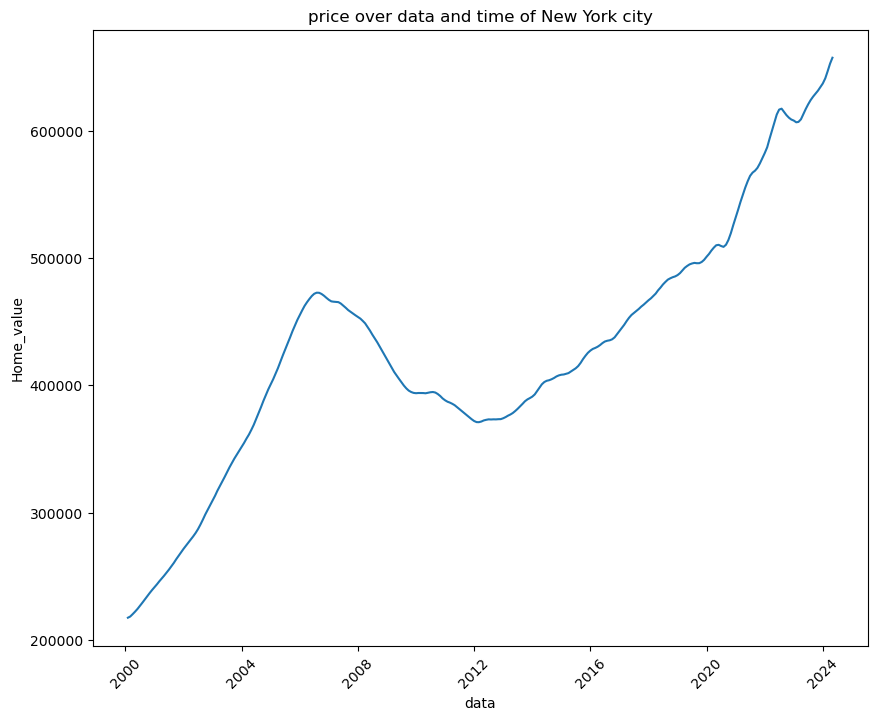

In [13]:
#plot
plt.figure(figsize=(10,8))
sns.lineplot(x='Date',y='Value',data=city_data)
plt.title('price over data and time of New York city')
plt.xlabel('data')
plt.ylabel('Home_value')
plt.xticks(rotation=45)
plt.show()

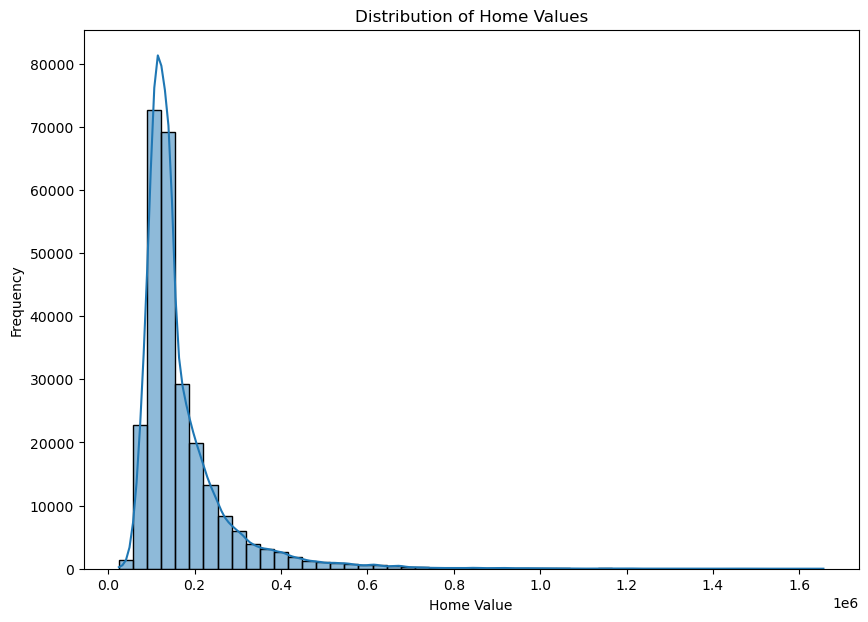

In [14]:

plt.figure(figsize=(10,7))
sns.histplot(df_melted[df_melted['Metric'] == 'HomeValue']['Value'], bins=50, kde=True)
plt.title('Distribution of Home Values')
plt.xlabel('Home Value')
plt.ylabel('Frequency')
plt.show()




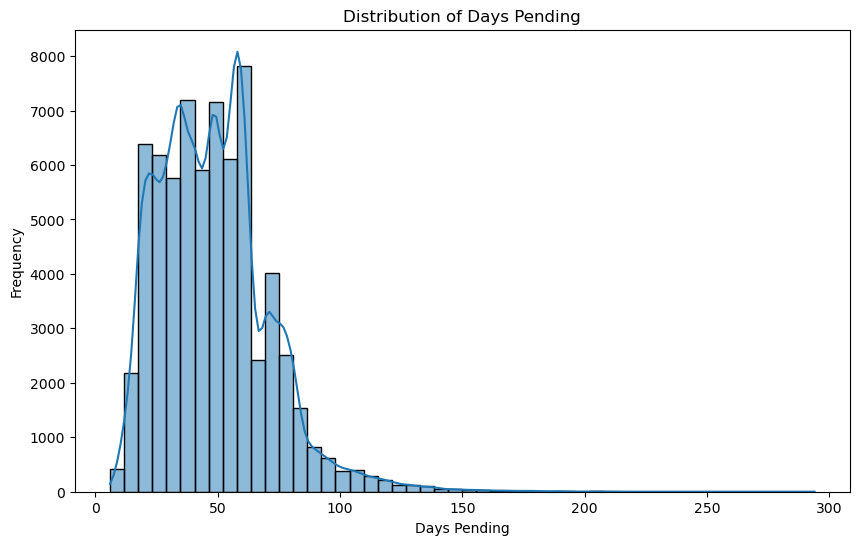

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df_melted[df_melted['Metric']=='DaysPending']['Value'],bins=50,kde=True)
plt.title('Distribution of Days Pending')
plt.xlabel('Days Pending')
plt.ylabel('Frequency')
plt.show()

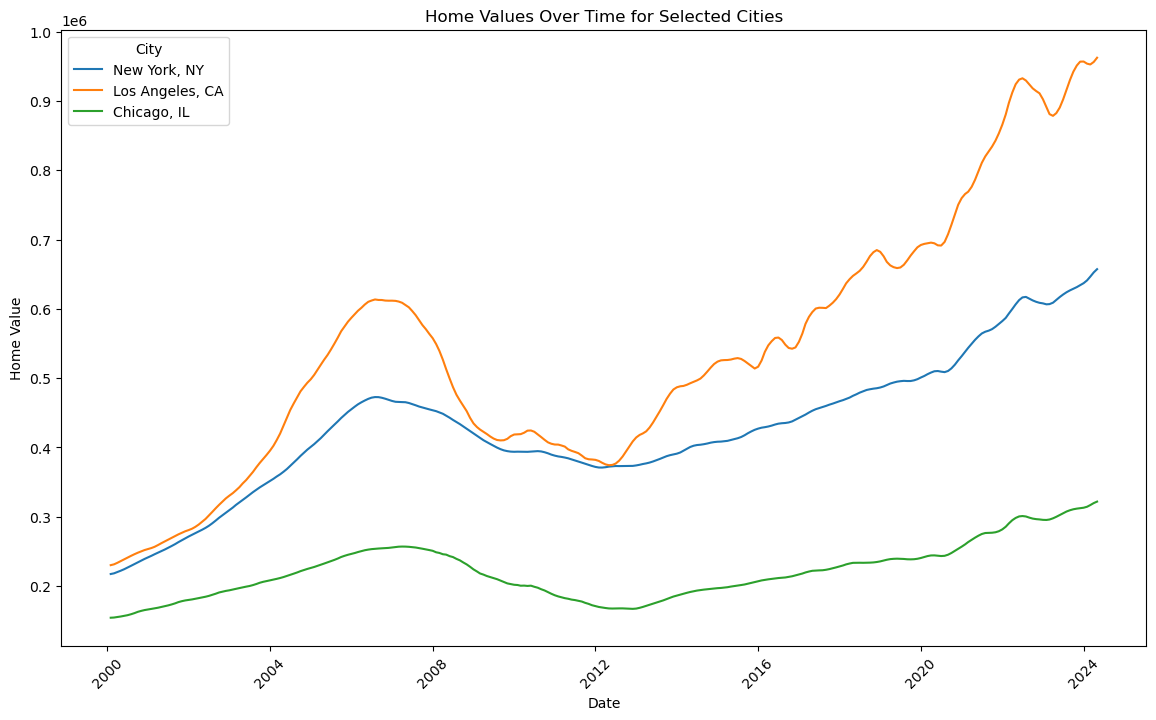

In [16]:
#time series plot of home values for multiple cities

cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL']
plt.figure(figsize=(14, 8))

for city in cities:
    city_data = df_melted[(df_melted['RegionName'] == city) & (df_melted['Metric'] == 'HomeValue')]
    sns.lineplot(x='Date', y='Value', data=city_data, label=city)

plt.title('Home Values Over Time for Selected Cities')
plt.xlabel('Date')
plt.ylabel('Home Value')
plt.legend(title='City')
plt.xticks(rotation=45)
plt.show()
                        

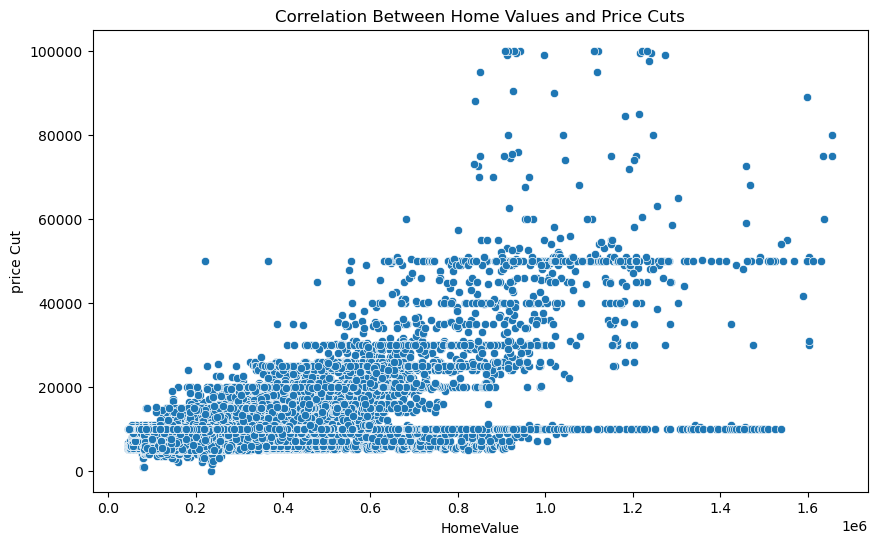

In [17]:
df_home_value= df_melted[df_melted['Metric']=='HomeValue']
df_cut_raw=df_melted[df_melted['Metric']=='CutRaw']

#merge on common columns to align the data for scatter plot

merged_df = df_home_value.merge(df_cut_raw, on=['RegionID','SizeRank','RegionName','StateName','Date'], suffixes=('_HomeValue','_CutRaw'))

plt.figure(figsize=(10,6))
sns.scatterplot(x='Value_HomeValue',y='Value_CutRaw', data=merged_df)
plt.title('Correlation Between Home Values and Price Cuts')
plt.xlabel('HomeValue')
plt.ylabel('price Cut')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

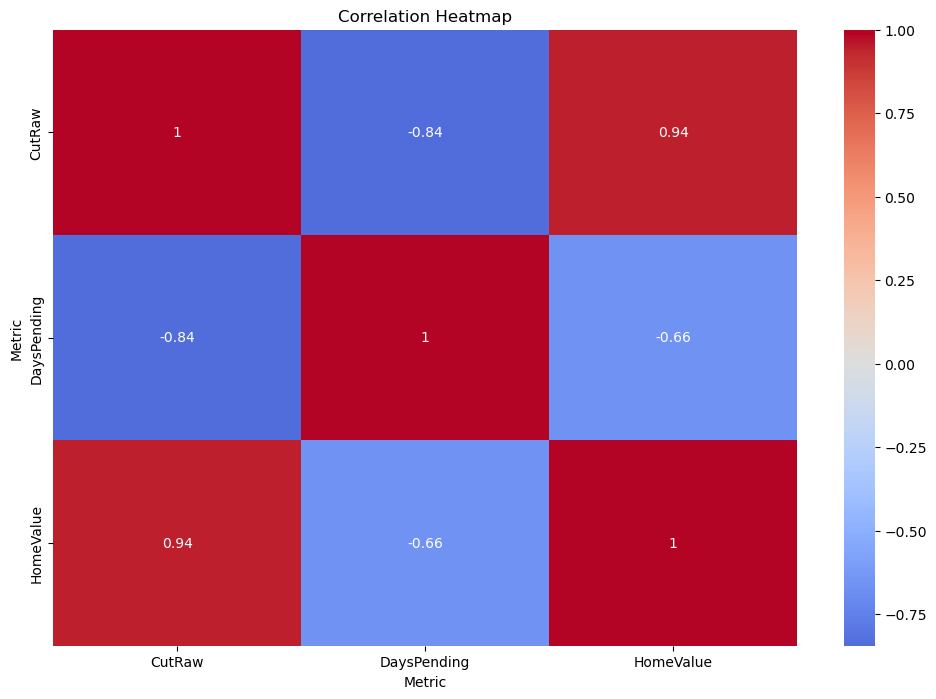

In [18]:
#calculate the correlation matrix

corr=df_melted.pivot_table(index='Date',columns='Metric', values='Value').corr()

#plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',center=0)
plt.title('Correlation Heatmap')
plt.show

## Statistical Analysis of Real Estate Metrics

In [19]:
#Statistical Analysis

import numpy as np
#Calculate the mean, median, standard daviation of home values
metric='HomeValue' 

metric_data=df_melted[df_melted['Metric']==metric]
mean_value=np.mean(metric_data['Value'])
median_value = np.median(metric_data['Value'])
std_dev_value=np.std(metric_data['Value'])

print(f"Mean {metric}: {mean_value}")
print(f"Median {metric}: {median_value}")
print(f"Standard Deviation of {metric}: {std_dev_value}")

Mean HomeValue: 168336.3102110192
Median HomeValue: 136482.47681929034
Standard Deviation of HomeValue: 107958.0740253724


In [20]:
import numpy as np
#Calculate the mean, median, standard daviation of CutRaw
metric='CutRaw' 

metric_data=df_melted[df_melted['Metric']==metric]
mean_value=np.mean(metric_data['Value'])
median_value = np.median(metric_data['Value'])
std_dev_value=np.std(metric_data['Value'])

print(f"Mean {metric}: {mean_value}")
print(f"Median {metric}: {median_value}")
print(f"Standard Deviation of {metric}: {std_dev_value}")

Mean CutRaw: 9111.597547703694
Median CutRaw: 9900.0
Standard Deviation of CutRaw: 5192.616576665063


In [21]:
# Ensure 'Date' is in datetime format
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%Y-%m')

In [22]:
# Separate the home values and price cuts data
df_home_value = df_melted[df_melted['Metric'] == 'HomeValue']
df_cut_raw = df_melted[df_melted['Metric'] == 'CutRaw']

In [23]:
# Merge on common columns to align the data for predictive modeling
merged_df = df_home_value.merge(df_cut_raw, on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date'], suffixes=('_HomeValue', '_CutRaw'))

In [24]:
## Extract useful features from the Date column
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['DayOfYear'] = merged_df['Date'].dt.dayofyear
merged_df['UnixTimestamp'] = merged_df['Date'].astype(np.int64) // 10**9

## Predictive Modeling

In [46]:
#Linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = merged_df[['Year', 'Month', 'DayOfYear', 'UnixTimestamp', 'Value_HomeValue']]
y = merged_df['Value_CutRaw']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, lr_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12376484.575498791


In [26]:
#random forest model
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest MSE: {rf_mse}')


Random Forest MSE: 9490591.826818777


In [27]:
#support vector regression
from sklearn.svm import SVR

#train the model
svr_model = SVR(kernel='rbf',C=100, gamma=0.1 , epsilon=.1)
svr_model.fit(X_train,y_train)


#predictions
svr_pred = svr_model.predict(X_test)

#Evaluate
svr_mse = mean_squared_error(y_test,svr_pred)
print(f'SVR MSE: {svr_mse}')

SVR MSE: 27228727.824497312


In [36]:
#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

#train the model
gbr_model = GradientBoostingRegressor(n_estimators=100 , random_state=42)
gbr_model.fit(X_train,y_train)

#predictions
gbr_pred = gbr_model.predict(X_test)

#Evaluate
gbr_mse = mean_squared_error(y_test,gbr_pred)
print(f'Gradient Boosting Regressor MSE: {gbr_mse}')


Gradient Boosting Regressor MSE: 8500230.838718345


## Visualizing Model Performance

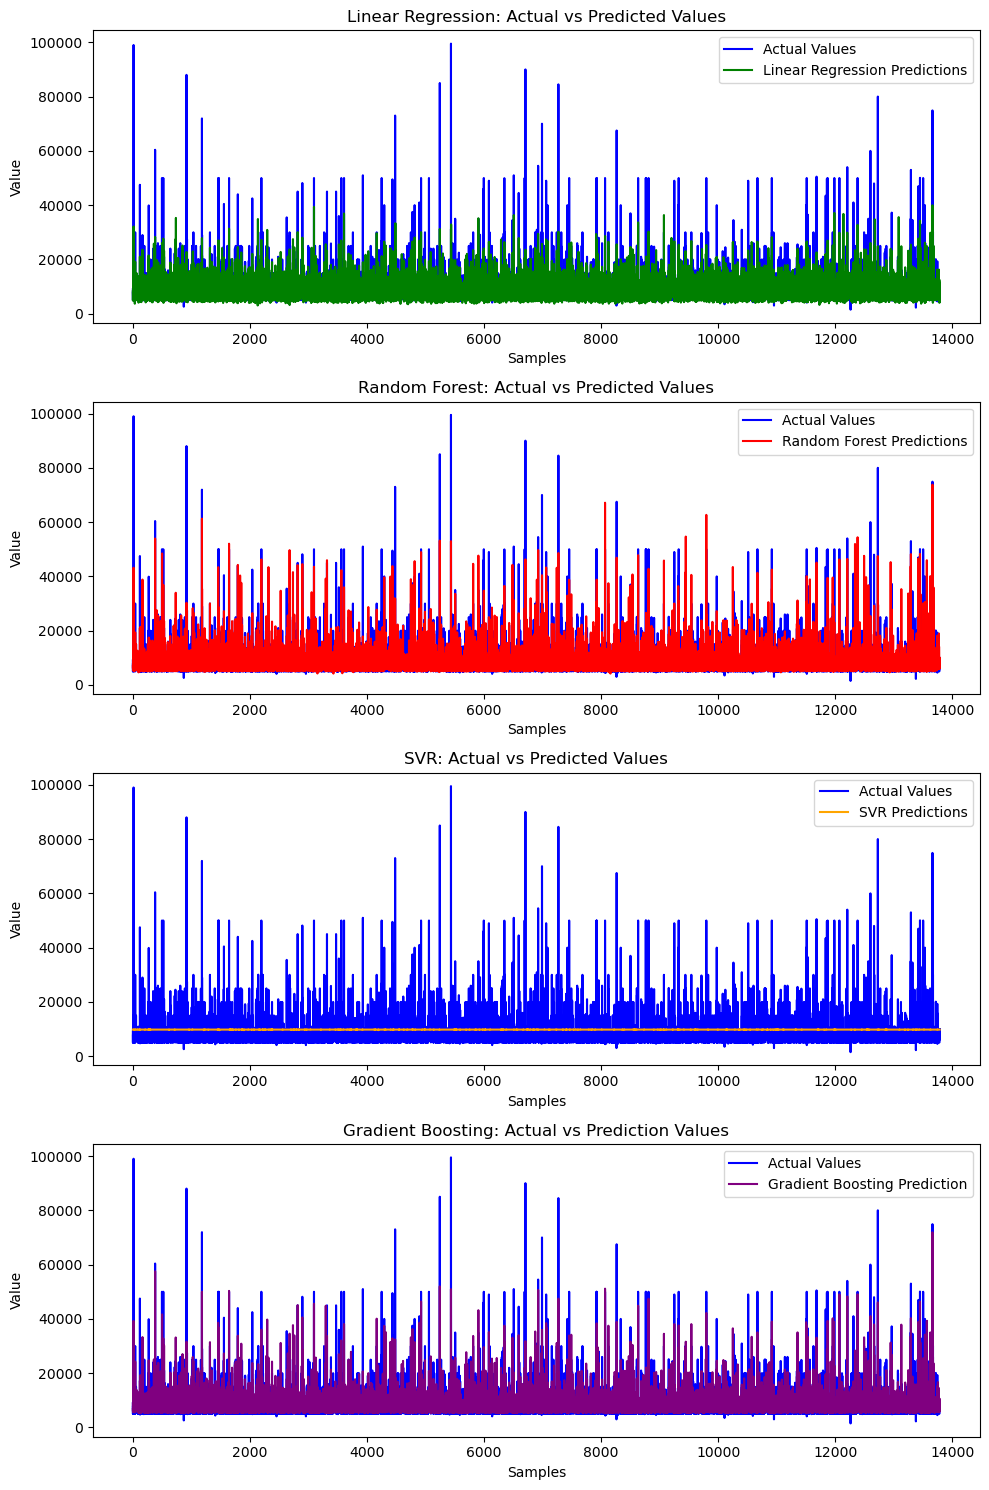

In [57]:

plt.figure(figsize=(10, 15))
# Plot for Linear Regression

plt.subplot(4, 1, 1)
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(lr_pred, label='Linear Regression Predictions', color='green')
plt.legend()
plt.title('Linear Regression: Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')

# Plot for Random Forest
plt.subplot(4, 1, 2)
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(rf_pred, label='Random Forest Predictions', color='red')
plt.legend()
plt.title('Random Forest: Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')

# Plot for SVR
plt.subplot(4, 1, 3)
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(svr_pred, label='SVR Predictions', color='orange')
plt.legend()
plt.title('SVR: Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')

#plot for Gradient Boosting
plt.subplot(4,1,4)
plt.plot(y_test.values , label='Actual Values' ,color = 'blue')
plt.plot(gbr_pred , label = 'Gradient Boosting Prediction' , color= 'purple')
plt.legend()
plt.title('Gradient Boosting: Actual vs Prediction Values')
plt.xlabel('Samples')
plt.ylabel('Value')



plt.tight_layout()
plt.show()

## Conclusion

### In this project, we embarked on a comprehensive analysis of real estate trends using a dataset encompassing various metrics across different regions in the United States. The primary objectives were to understand historical home values, explore correlations between metrics like home values and days pending, and develop predictive models to forecast price cuts based on historical trends.

### Key Findings:

#### 1.Temporal Analysis of Home Values: Through time series analysis, we observed fluctuations in home values across major cities like New York, Los Angeles, and Chicago. The data highlighted seasonal patterns and long-term trends that influence property prices.

#### 2.Correlation Insights: Exploring correlations between metrics such as home values and price cuts revealed significant relationships. For instance, regions experiencing higher home values often showed lower incidences of price cuts, suggesting a nuanced market dynamic.

#### 3.Predictive Modeling: Utilizing machine learning algorithms including Linear Regression, Random Forest, SVR, and Gradient Boosting, we aimed to predict price cuts based on historical data. Each model exhibited varying degrees of predictive accuracy, with Gradient Boosting performing notably well due to its ability to capture complex relationships.

#### 4.Statistical Analysis: Calculating statistical measures like mean, median, and standard deviation provided deeper insights into the distribution and variability of home values and price cuts, essential for understanding market stability and volatility.

### In conclusion, this project not only deepened our understanding of real estate dynamics but also demonstrated the application of advanced analytical techniques to derive actionable insights. By leveraging data-driven approaches, we aim to contribute to informed decision-making in real estate investment and market analysis.